# March Madness Machine Learning Project

Autor: Dominik Babić

## Reprodukcija rezultata eksperimenata


Navedeni rad kao pristup rješavanja problema predviđanja vjerojatnosti pobjede određene ekipe uzima individualno uvažavanje varijabli koje statistički najviše koreliraju s postotkom pobjede, izračunavanje kvadratne regresijske funkcije nad njima te zatim očekivanje vjerojatni pobjede nad skupom izračunatih regresijskih vrijednosti.

Značajke koje su u radu određene kao najznačajnije su:
- Razlika u **RPI** rangiranju (*Rating Percentage Index*)
- Razlika u **BPI** (*Basketball Power Index*)
- Razlika u ukupnom broju poena (Razlika u ukupnom broju poena)
- Razlika u ukupnom broju ukradenih lopti (Razlika u ukupnom broju ukradenih lopti)
- Razlika u ukupnom broju blokada (Razlika u ukupnom broju blokada)
- Razlika u postotku šuta iz igre (Razlika u postotku šuta iz igre)

To su značajke koje su dostupne prije samih odigranih utakmica, tj. predstavljaju statistike timova kroz njihovu regularnu sezonu, što ih čini idealnim za korištenje pri predviđanju pobjednika. 

Naime, podaci o samoj utakmici nam neće pomoći jer su oni dostupni tek nakon što je utakmica odigrana, a cilj nam je predvidjeti pobjednika prije samog početka utakmice.

Ovo znanje iskoristit ćemo pri replikaciji eksperimenata iz rada.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

Prvo ćemo izvući navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede.
U tu svrhu iskoristit ćemo `Tournament Team Data (Including 2023).csv` i `Game Data.csv` datoteke za treniranje te `2023 Game Data.csv` za testiranje modela s obzirom da želimo izvesti predviđanja za timove koji su se kvalificirali u sezoni 2022./2023.

BPI vrijednosti za ekipe kroz godine dohvaćene su s ESPN-ovog API-ja te su spremljene u `bpi_data.csv` datoteku.

In [210]:
tournament_team_data = pd.read_csv('march-madness-data/Tournament Team Data (Including 2023).csv')
game_data = pd.read_csv('march-madness-data/Game Data.csv')
game_data_2023 = pd.read_csv('march-madness-data/2023 Game Data.csv')
bpi_data = pd.read_csv('march-madness-data/bpi_data.csv')

# Nekonzistentnost podataka skupljenih za BPI index s nazivima timova u ostalim skupovima
# bpi_data['TEAM'] = bpi_data['TEAM'].replace(r'\b(\w+\s*St)\b', r'\1.', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace('State', 'St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].str.replace(r'\bMiami\b', 'Miami FL', regex=True)
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Fullerton', 'Cal St. Fullerton')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Jacksonville', 'Jacksonville St.')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('St Bonaventure', 'St. Bonaventure')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Texas A&M-CC', 'Texas A&M CC')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Santa Barbara', 'UC Santa Barbara')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Abilene Chrstn', 'Abilene Christian')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('E Washington', 'Eastern Washington')
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Mount St. Marys', "Mount St. Mary's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace('Virginia ', "Virginia")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("St John's", "St. John's")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Kentucky", "Northern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Fair Dickinson", "Fairleigh Dickinson")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Gardner-Webb", "Gardner Webb")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Dakota St.", "North Dakota St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC Central", "North Carolina Central")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC St.", "North Carolina St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Prairie View", "Prairie View A&M")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Charleston", "College of Charleston")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SF Austin", "Stephen F. Austin")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Long Island", "LIU Brooklyn")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("MTSU", "Middle Tennessee")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("ETSU", "East Tennessee St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FGCU", "Florida Gulf Coast")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Pitt", "Pittsburgh")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Little Rock", "Arkansas Little Rock")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Hawai'i", "Hawaii")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Bakersfield", "Cal St. Bakersfield")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UAlbany", "Albany")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Coastal Car", "Coastal Carolina")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("UMass", "Massachusetts")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("G Washington", "George Washington")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("W Michigan", "Western Michigan")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Louisiana", "Louisiana Lafayette")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("E Kentucky", "Eastern Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N'Western St.", "Northwestern St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("NC A&T", "North Carolina A&T")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Western KY", "Western Kentucky")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Detroit Mercy", "Detroit")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Miss Valley St.", "Mississippi Valley St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("N Colorado", "Northern Colorado")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Boston U", "Boston University")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("Sam Houston", "Sam Houston St.")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("AR-Pine Bluff", "Arkansas Pine Bluff")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("CSU Northridge", "Cal St. Northridge")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("FAU", "Florida Atlantic")
# bpi_data['TEAM'] = bpi_data['TEAM'].replace("SE Missouri", "Southeast Missouri St.")
# bpi_data.to_csv('march-madness-data/bpi_data.csv', index=False)

tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Virginia ", "Virginia")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Mississippi", "Mississippi St.")
tournament_team_data['TEAM'] = tournament_team_data['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")
game_data_2023['TEAM'] = game_data_2023['TEAM'].replace("Texas A&M Corpus Chris", "Texas A&M CC")

tournament_team_data = tournament_team_data.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS']]
tournament_team_data = tournament_team_data.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')
game_data_2023 = game_data_2023.merge(bpi_data, on=['YEAR', 'TEAM'], how='left')

tournament_team_data.info()
tournament_team_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           1011 non-null   int64  
 1   SEED                           1011 non-null   int64  
 2   TEAM                           1011 non-null   object 
 3   WIN %                          1011 non-null   float64
 4   BLOCK %                        1011 non-null   float64
 5   EFG %                          1011 non-null   float64
 6   BARTHAG                        1011 non-null   float64
 7   DEFENSIVE REBOUND %            1011 non-null   float64
 8   POINTS PER POSSESSION OFFENSE  1011 non-null   float64
 9   ELITE SOS                      1011 non-null   float64
 10  BPI                            1011 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 87.0+ KB


,YEAR,SEED,WIN %,BLOCK %,EFG %,BARTHAG,DEFENSIVE REBOUND %,POINTS PER POSSESSION OFFENSE,ELITE SOS,BPI
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,2015.255193,8.768546,72.484097,10.526805,52.022849,0.797466,70.654995,1.087527,23.771562,9.312661
std,4.591874,4.673269,9.962943,2.889600,2.711947,0.168642,3.227122,0.049497,8.977729,6.165912
min,2008.000000,1.000000,36.670000,3.700000,41.900000,0.129000,60.700000,0.907000,5.060000,-16.000000
25%,2011.000000,5.000000,65.630000,8.500000,50.100000,0.743500,68.400000,1.055000,14.925000,5.800000
50%,2015.000000,9.000000,72.730000,10.200000,52.000000,0.860000,70.500000,1.088000,25.700000,10.100000
75%,2019.000000,13.000000,78.790000,12.450000,53.900000,0.914000,72.800000,1.122000,31.345000,13.500000
max,2023.000000,16.000000,100.000000,21.400000,61.000000,0.985000,81.400000,1.241000,41.630000,23.900000


In [211]:
game_data_2023 = game_data_2023.loc[:, ['YEAR', 'SEED', 'TEAM', 'WIN %', 'BLOCK %', 'EFG %', 'BARTHAG', 'DEFENSIVE REBOUND %', 'POINTS PER POSSESSION OFFENSE', 'ELITE SOS','BPI']]

game_data_2023.info()
game_data_2023.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YEAR                           148 non-null    int64  
 1   SEED                           148 non-null    int64  
 2   TEAM                           148 non-null    object 
 3   WIN %                          148 non-null    float64
 4   BLOCK %                        148 non-null    float64
 5   EFG %                          148 non-null    float64
 6   BARTHAG                        148 non-null    float64
 7   DEFENSIVE REBOUND %            148 non-null    float64
 8   POINTS PER POSSESSION OFFENSE  148 non-null    float64
 9   ELITE SOS                      148 non-null    float64
 10  BPI                            148 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 12.8+ KB


,YEAR,SEED,WIN %,BLOCK %,EFG %,BARTHAG,DEFENSIVE REBOUND %,POINTS PER POSSESSION OFFENSE,ELITE SOS,BPI
count,148.0,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2023.0,6.567568,73.526495,10.362162,52.475000,0.847297,72.583784,1.096020,26.486189,11.058784
std,0.0,4.472383,9.725172,2.476815,2.368267,0.129397,2.814807,0.043223,7.577910,5.750598
min,2023.0,1.000000,37.500000,4.500000,46.200000,0.215000,62.700000,0.939000,5.149000,-9.200000
25%,2023.0,3.000000,65.625000,8.300000,51.200000,0.824000,71.000000,1.062000,23.623000,9.350000
50%,2023.0,6.000000,73.861480,10.000000,52.200000,0.884000,72.650000,1.096000,28.128000,11.700000
75%,2023.0,10.000000,81.250000,12.025000,53.500000,0.927000,74.500000,1.129000,30.680500,14.275000
max,2023.0,16.000000,91.176471,16.400000,58.600000,0.959000,78.200000,1.205000,38.469000,20.500000


Sada ćemo pokušati izvesti navedene značajke iz našeg skupa podataka te prikazati njihovu korelaciju s postotkom pobjede. Možemo primjetiti da neke od navedenih značajki nisu dostupne u skupu podataka, a nije ih moguće izračunati iz dostupnih podataka, one će biti zamijenjene sličnim značajkama koje su dostupne u skupu podataka (nisu dostupni BPI, RPI, ukupni blokovi, ukupni poeni i broj ukradenih lopti).

Prvi korak je diskretiziranje ishoda pobjednika i gubitnika utakmica čije podatke imamo u skupu podataka `Game Data.csv`. U tom skupu podataka svaka dva retka prikazuju podatke o jednoj utakmici.

In [212]:
new_columns = ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 WIN', 'TEAM 1 LOCATION']
game_data['TEAM 1 WIN'] = game_data['TEAM 1 OUTCOME'].map({'W': 1, 'L': 0})
game_data = game_data.loc[:, new_columns]
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160226 entries, 0 to 160225
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   YEAR             160226 non-null  int64 
 1   TEAM 1           160226 non-null  object
 2   TEAM 2           160226 non-null  object
 3   TEAM 1 WIN       160226 non-null  int64 
 4   TEAM 1 LOCATION  160226 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.1+ MB


Sada ćemo u ovu tablicu nadodati podatke pobjednika i gubitnika za istu godinu iz tablice `Tournament Team Data (Including 2023).csv` te izračunati razliku u svim značajkama koje su nam dostupne. Osim toga, izračunat ćemo podatke koji nam nedostaju, a to je RPI index. RPI index je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Ovaj indeks je dostupan za svaku ekipu u tablici `Tournament Team Data (Including 2023).csv` te ćemo ga iskoristiti za izračun RPI indeksa za svaku utakmicu u tablici `Game Data.csv`.

In [213]:
merged_data_team1 = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'TEAM 1'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_team1 = merged_data_team1.drop(["TEAM"], axis=1)
merged_data_team1 = merged_data_team1.rename(columns=lambda x: 'TEAM 1 ' + x if x not in ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 LOCATION', 'TEAM 1 WIN'] else x)

merged_data_team2 = pd.merge(game_data, tournament_team_data, left_on=['YEAR', 'TEAM 2'], right_on=['YEAR', 'TEAM'], how='outer')
merged_data_team2 = merged_data_team2.drop(["TEAM"], axis=1)
merged_data_team2 = merged_data_team2.rename(columns=lambda x: 'TEAM 2 ' + x if x not in ['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 LOCATION', 'TEAM 1 WIN'] else x)

merged_data = pd.merge(merged_data_team1, merged_data_team2, on=['YEAR', 'TEAM 1', 'TEAM 2', 'TEAM 1 LOCATION', 'TEAM 1 WIN'], how='outer')

# Filter out non-numeric columns
numeric_cols = merged_data.select_dtypes(include=[np.number]).columns

for col in numeric_cols.values:
    if merged_data[col].isnull().values.any():
        merged_data[col].fillna(merged_data[col].interpolate(), inplace=True)

merged_data.dropna(inplace=True)
merged_data.describe()

,YEAR,TEAM 1 WIN,TEAM 1 SEED,TEAM 1 WIN %,TEAM 1 BLOCK %,TEAM 1 EFG %,TEAM 1 BARTHAG,TEAM 1 DEFENSIVE REBOUND %,TEAM 1 POINTS PER POSSESSION OFFENSE,TEAM 1 ELITE SOS,TEAM 1 BPI,TEAM 2 SEED,TEAM 2 WIN %,TEAM 2 BLOCK %,TEAM 2 EFG %,TEAM 2 BARTHAG,TEAM 2 DEFENSIVE REBOUND %,TEAM 2 POINTS PER POSSESSION OFFENSE,TEAM 2 ELITE SOS,TEAM 2 BPI
count,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000
mean,2014.985214,0.500040,9.561276,72.392097,10.360369,51.991571,0.769096,70.555761,1.085691,22.166392,8.367239,9.559405,72.858177,10.403389,51.898783,0.766304,70.518415,1.085020,21.774387,8.409688
std,4.280768,0.500002,4.149958,8.541507,2.467137,2.317412,0.157454,2.894288,0.041015,8.136089,5.617103,4.163432,8.827718,2.443774,2.440188,0.160607,2.924492,0.043611,7.990965,5.598343
min,2008.000000,0.000000,1.000000,36.670000,3.700000,41.900000,0.129000,60.700000,0.907000,5.060000,-16.000000,1.000000,36.670000,3.700000,41.900000,0.129000,60.700000,0.907000,5.060000,-16.000000
25%,2011.000000,0.000000,6.214332,66.646923,8.600000,50.326418,0.660830,68.558375,1.059929,14.826769,4.110450,6.142857,67.300000,8.700000,50.200000,0.673833,68.457211,1.057375,14.560400,4.653846
50%,2015.000000,1.000000,9.994885,72.615776,10.072000,52.100000,0.823470,70.476000,1.084455,22.066259,8.954658,10.000000,73.607143,10.235294,51.900000,0.817800,70.400000,1.085731,21.669091,8.920000
75%,2019.000000,1.000000,13.000000,78.063363,11.974276,53.500000,0.892831,72.512725,1.113000,29.352905,12.413953,13.000000,78.707309,12.000000,53.500000,0.888634,72.525000,1.114000,28.796351,12.387500
max,2022.000000,1.000000,16.000000,100.000000,21.400000,61.000000,0.985000,81.400000,1.241000,41.630000,23.900000,16.000000,100.000000,21.400000,61.000000,0.985000,81.400000,1.241000,41.630000,23.900000


Sada ćemo isti postupak provesti nad tablicom `2023 Game Data.csv` kako bismo dobili podatke za testiranje prediktivnih sposobnosti modela. Te podatke ćemo zatim spojiti s ostalim podacima, kako bi za svaku utakmicu mogli izračunati RPI indeks.

In [214]:
cols = merged_data.columns
new_game_data_rows = []

for i in range(0, len(game_data_2023), 2):
    team1_row = game_data_2023.iloc[i]
    team2_row = game_data_2023.iloc[i + 1]
    
    # TEAM 1 WIN cu u ovim podacima postaviti na 0, ali kasnije ću ih opet izdvojiti od onih za treniranje pa nam to 
    new_row = [team1_row['YEAR'], team1_row['TEAM'], team2_row['TEAM'], 0, 'N', team1_row['SEED'],
               team1_row['WIN %'], team1_row['BLOCK %'], team1_row['EFG %'], team1_row['BARTHAG'], 
               team1_row['DEFENSIVE REBOUND %'], team1_row['POINTS PER POSSESSION OFFENSE'], 
               team2_row['ELITE SOS'], team1_row['BPI'], team2_row['SEED'], team2_row['WIN %'], 
               team2_row['BLOCK %'], team2_row['EFG %'], team2_row['BARTHAG'], team2_row['DEFENSIVE REBOUND %'], 
               team2_row['POINTS PER POSSESSION OFFENSE'], team2_row['ELITE SOS'], team2_row['BPI']]

    new_game_data_rows.append(new_row)

test_game_data = pd.DataFrame(new_game_data_rows, columns=cols)
test_game_data.describe()

,YEAR,TEAM 1 WIN,TEAM 1 SEED,TEAM 1 WIN %,TEAM 1 BLOCK %,TEAM 1 EFG %,TEAM 1 BARTHAG,TEAM 1 DEFENSIVE REBOUND %,TEAM 1 POINTS PER POSSESSION OFFENSE,TEAM 1 ELITE SOS,TEAM 1 BPI,TEAM 2 SEED,TEAM 2 WIN %,TEAM 2 BLOCK %,TEAM 2 EFG %,TEAM 2 BARTHAG,TEAM 2 DEFENSIVE REBOUND %,TEAM 2 POINTS PER POSSESSION OFFENSE,TEAM 2 ELITE SOS,TEAM 2 BPI
count,74.0,74.0,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2023.0,0.0,3.189189,77.194353,10.555405,52.962162,0.912541,72.571622,1.109135,22.597284,13.939189,9.945946,69.858637,10.168919,51.987838,0.782054,72.595946,1.082905,22.597284,8.178378
std,0.0,0.0,2.156073,8.744807,2.424766,2.271425,0.036059,2.608286,0.041088,8.181006,4.853972,3.534146,9.311657,2.529439,2.377748,0.154228,3.025120,0.041534,8.181006,5.119564
min,2023.0,0.0,1.000000,59.375000,6.800000,47.200000,0.807000,62.700000,1.028000,5.149000,-9.200000,4.000000,37.500000,4.500000,46.200000,0.215000,62.700000,0.939000,5.149000,-9.200000
25%,2023.0,0.0,1.000000,71.875000,8.700000,51.500000,0.886000,71.700000,1.083000,14.544750,12.050000,7.000000,63.636364,8.200000,50.950000,0.768750,71.000000,1.058000,14.544750,7.000000
50%,2023.0,0.0,3.000000,78.125000,10.000000,52.700000,0.916000,72.600000,1.106000,25.244500,14.200000,10.000000,68.750000,9.900000,51.750000,0.827000,73.150000,1.088000,25.244500,9.400000
75%,2023.0,0.0,4.000000,85.294118,11.900000,53.725000,0.939000,74.000000,1.134750,28.629500,16.450000,12.000000,76.617647,12.400000,53.200000,0.879250,74.725000,1.115000,28.629500,11.600000
max,2023.0,0.0,8.000000,91.176471,16.400000,58.500000,0.959000,78.200000,1.205000,36.960000,20.500000,16.000000,90.909091,14.800000,58.600000,0.942000,78.200000,1.165000,36.960000,18.300000


RPI indeks je indeks koji se računa na temelju pobjeda i poraza ekipe, kao i pobjeda i poraza protivnika ekipe. Opća formula za izračun RPI indeksa je:
$$
RPI = 0.25 * WP + 0.5 * OWP + 0.25 * OOWP
$$
gdje:
- WP predstavlja postotak pobjeda ekipe
- OWP predstavlja prosječni postotak pobjeda protivnika ekipe
- OOWP predstavlja prosječni postotak pobjeda protivnika protivnika ekipe

Protivnički postotak pobjeda i postotak pobjeda protivnika tih protivnika čine snagu rasporeda (SOS). Stoga, SOS čini 75% RPI izračuna.
Znajući to, RPI indeks možemo izračunati na sljedeći način:
$$
RPI = 0.25 * WP + 0.75 * SOS
$$

U sljedećim odlomcima koda, izveo sam oba pristupa računanja RPI indeksa, a u svrhu ovog rada, koristit ćemo drugi pristup.

In [ ]:
# Calculate OWP
owp_data = merged_data.groupby(['YEAR', 'WINNING TEAM']).agg({'LOSER TEAM WIN %': 'mean'}).reset_index()
owp_data = owp_data.rename(columns={'LOSER TEAM WIN %': 'OWP', 'WINNING TEAM': 'TEAM'})

# Calculate OOWP
oowp_data = owp_data.groupby(['YEAR', 'TEAM']).agg({'OWP': 'mean'}).reset_index()
oowp_data = oowp_data.rename(columns={'OWP': 'OOWP'})

# Merge OWP and OOWP data with merge_data
merged_data = pd.merge(owp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'WINNING TEAM'], how='left', suffixes=('', '_winning'))
merged_data = pd.merge(oowp_data, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'WINNING TEAM'], how='left', suffixes=('', '_winning'))

# Calculate RPI index for WINNING TEAM
merged_data['RPI WINNING TEAM'] = (0.25 * merged_data['WINNER TEAM WIN %']) + (0.50 * merged_data['OWP']) + (0.25 * merged_data['OOWP'])
merged_data = merged_data.drop(['OWP', 'OOWP', 'TEAM_winning'], axis=1)

merged_data.info()

# Repeat the process for LOSING TEAM
owp_data_losing = merged_data.groupby(['YEAR', 'LOSING TEAM']).agg({'WINNER TEAM WIN %': 'mean'}).reset_index()
owp_data_losing = owp_data_losing.rename(columns={'WINNER TEAM WIN %': 'OWP', 'LOSING TEAM': 'TEAM'})

oowp_data_losing = owp_data_losing.groupby(['YEAR', 'TEAM']).agg({'OWP': 'mean'}).reset_index()
oowp_data_losing = oowp_data_losing.rename(columns={'OWP': 'OOWP'})

# Merge OWP and OOWP data with merge_data for LOSING TEAM
# merged_data = pd.merge(owp_data_losing, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'LOSING TEAM'], how='left', suffixes=('', '_merged'))
# merged_data = pd.merge(oowp_data_losing, merged_data, left_on=['YEAR', 'TEAM'], right_on=['YEAR', 'LOSING TEAM'], how='left', suffixes=('', '_merged_1'))

# Calculate RPI index for LOSING TEAM
# merged_data['RPI LOSING TEAM'] = (0.25 * merged_data['LOSER TEAM WIN %']) + (0.50 * merged_data['OWP']) + (0.25 * merged_data['OOWP'])
# merged_data = merged_data.drop(['OWP', 'OOWP', 'TEAM_merged_1'], axis=1)

# merged_data.info()
# merged_data.describe()


### Računanje RPI indeksa koristeći WP i SOS

In [215]:
merged_data['RPI TEAM 1'] = 0.25 * merged_data['TEAM 1 WIN %'] + 0.75 * merged_data['TEAM 1 ELITE SOS']
merged_data['RPI TEAM 2'] = 0.25 * merged_data['TEAM 2 WIN %'] + 0.75 * merged_data['TEAM 2 ELITE SOS']

test_game_data['RPI TEAM 1'] = 0.25 * test_game_data['TEAM 1 WIN %'] + 0.75 * test_game_data['TEAM 1 ELITE SOS']
test_game_data['RPI TEAM 2'] = 0.25 * test_game_data['TEAM 2 WIN %'] + 0.75 * test_game_data['TEAM 2 ELITE SOS']
merged_data.describe()

,YEAR,TEAM 1 WIN,TEAM 1 SEED,TEAM 1 WIN %,TEAM 1 BLOCK %,TEAM 1 EFG %,TEAM 1 BARTHAG,TEAM 1 DEFENSIVE REBOUND %,TEAM 1 POINTS PER POSSESSION OFFENSE,TEAM 1 ELITE SOS,...,TEAM 2 WIN %,TEAM 2 BLOCK %,TEAM 2 EFG %,TEAM 2 BARTHAG,TEAM 2 DEFENSIVE REBOUND %,TEAM 2 POINTS PER POSSESSION OFFENSE,TEAM 2 ELITE SOS,TEAM 2 BPI,RPI TEAM 1,RPI TEAM 2
count,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,...,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000,163735.000000
mean,2014.985214,0.500040,9.561276,72.392097,10.360369,51.991571,0.769096,70.555761,1.085691,22.166392,...,72.858177,10.403389,51.898783,0.766304,70.518415,1.085020,21.774387,8.409688,34.722818,34.545335
std,4.280768,0.500002,4.149958,8.541507,2.467137,2.317412,0.157454,2.894288,0.041015,8.136089,...,8.827718,2.443774,2.440188,0.160607,2.924492,0.043611,7.990965,5.598343,6.533316,6.640713
min,2008.000000,0.000000,1.000000,36.670000,3.700000,41.900000,0.129000,60.700000,0.907000,5.060000,...,36.670000,3.700000,41.900000,0.129000,60.700000,0.907000,5.060000,-16.000000,16.847500,16.847500
25%,2011.000000,0.000000,6.214332,66.646923,8.600000,50.326418,0.660830,68.558375,1.059929,14.826769,...,67.300000,8.700000,50.200000,0.673833,68.457211,1.057375,14.560400,4.653846,28.941853,29.050000
50%,2015.000000,1.000000,9.994885,72.615776,10.072000,52.100000,0.823470,70.476000,1.084455,22.066259,...,73.607143,10.235294,51.900000,0.817800,70.400000,1.085731,21.669091,8.920000,35.277500,35.078750
75%,2019.000000,1.000000,13.000000,78.063363,11.974276,53.500000,0.892831,72.512725,1.113000,29.352905,...,78.707309,12.000000,53.500000,0.888634,72.525000,1.114000,28.796351,12.387500,39.996821,39.912500
max,2022.000000,1.000000,16.000000,100.000000,21.400000,61.000000,0.985000,81.400000,1.241000,41.630000,...,100.000000,21.400000,61.000000,0.985000,81.400000,1.241000,41.630000,23.900000,50.605000,50.605000


Sada možemo izračunati razlike u statistikama za svaku utakmicu kako bismo dobili značajke koje ćemo koristiti za treniranje modela.

In [216]:
merged_data['EFG % DIFF'] = merged_data['TEAM 1 EFG %'] - merged_data['TEAM 2 EFG %']
merged_data['BLOCK % DIFF'] = merged_data['TEAM 1 BLOCK %'] - merged_data['TEAM 2 BLOCK %']
merged_data['BPI DIFF'] = merged_data['TEAM 1 BPI'] - merged_data['TEAM 2 BPI']
merged_data['RPI DIFF'] = merged_data['RPI TEAM 1'] - merged_data['RPI TEAM 2']
merged_data['PPPO DIFF'] = merged_data['TEAM 1 POINTS PER POSSESSION OFFENSE'] - merged_data['TEAM 2 POINTS PER POSSESSION OFFENSE']
merged_data['DEFENSIVE REBOUND % DIFF'] = merged_data['TEAM 1 DEFENSIVE REBOUND %'] - merged_data['TEAM 2 DEFENSIVE REBOUND %']
merged_data['WIN % DIFF'] = merged_data['TEAM 1 WIN %'] - merged_data['TEAM 2 WIN %']
merged_data['TEAM 1 WIN OUTCOME %'] = np.where(merged_data['TEAM 1 WIN'] == 1, merged_data['TEAM 1 WIN %']/100, (100 - merged_data['TEAM 1 WIN %'])/100)

test_game_data['EFG % DIFF'] = test_game_data['TEAM 1 EFG %'] - test_game_data['TEAM 2 EFG %']
test_game_data['BLOCK % DIFF'] = test_game_data['TEAM 1 BLOCK %'] - test_game_data['TEAM 2 BLOCK %']
test_game_data['BPI DIFF'] = test_game_data['TEAM 1 BPI'] - test_game_data['TEAM 2 BPI']
test_game_data['RPI DIFF'] = test_game_data['RPI TEAM 1'] - test_game_data['RPI TEAM 2']
test_game_data['PPPO DIFF'] = test_game_data['TEAM 1 POINTS PER POSSESSION OFFENSE'] - test_game_data['TEAM 2 POINTS PER POSSESSION OFFENSE']
test_game_data['DEFENSIVE REBOUND % DIFF'] = test_game_data['TEAM 1 DEFENSIVE REBOUND %'] - test_game_data['TEAM 2 DEFENSIVE REBOUND %']
test_game_data['WIN % DIFF'] = test_game_data['TEAM 1 WIN %'] - test_game_data['TEAM 2 WIN %']

### Primjedbama na znanstveni rad

U samom radu slabo je razrađeno što su oni zapravo koristili kao izlaz pri treniranju, kako su obradili podatke te kako su evaluirali izlaze modela kod treniranja.
Naime, može se primjetiti kako je ovo primjer zadatka za model logističke regresije gdje izlaz modela definira pobjedu odnosno poraz, no u radu je korišten ansamblovski model linearnih regresija, što je prilično neobično s obzirom na to da je izlaz modela (poraz/pobjeda) binarna varijabla. Jedan od glavnih nedostataka linearnih modela je taj što njihov izlaz ne mora biti u intervalu [0, 1], što je slučaj kod logističke regresije. 
No, problem kod logističke regresije je taj što je to model koji se koristi za klasifikaciju, a ne za regresiju, što je slučaj kod ovog zadatka. Model logističke regresije bi se mogao iskoristiti za predviđanje pobjednika, no taj pristup nije razrađen u radu.

**U radu nije jasno određeno kako su računali stvarne izlazne vjerojatnosti pobjede odnosno poraza, što stvara probleme.** 
Zato ćemo odraditi dva pristupa:
- Ciljanu brojčanu vrijednost definiramo kao binarnu varijablu koja predstavlja pobjedu odnosno poraz.
- Ciljanu brojčanu vrijednost definiramo kao statistika postotka pobjeda ekipe `TEAM 1`.

Za svaki slučaj istrenirat ćemo jedan ansambl modela kvadratne linearne regresije (kojoj ćemo izlaz ograničiti na interval [0, 1]) te jedan ansambl modela logističke regresije, pri čemu će ulaz u sigmoidalnu funkciju imati kvadratni oblik. Oba modela ćemo evaluirati na podacima za testiranje te ćemo usporediti njihove rezultate.

Sada ćemo pristupiti problem predviđanja pobjednika tako da ćemo za izlaz modela koristiti podatak pobjede odnosno poraza, a ne razliku postotak pobjeda. Primjeniti ćemo ansamblovski model linearnih regresija te ćemo evaluirati njegove izlaze, a prilikom poboljšanja rezultata, pokušat ćemo koristiti i druge modele (logističku regresiju ili općeniti model linearne regresije s aktivacijskim funkcijama).


### Prvi pristup
Značajka s kojom ćemo uspoređivati rezultate modela bit će **ishod utakmice (pojeda = 1, poraz = 0)**.
Ovdje ćemo još nadodati i jedan model logističke regresije koji uzima sve zanačajke kao ulaz.

In [217]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, RocCurveDisplay

In [218]:
features = ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF']
polys = []
linear_models =[]
logistic_models = []
train_data = merged_data.sample(n=2000, random_state=1)

poly_logistic = PolynomialFeatures(degree=2).fit(train_data[features])
logistic_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, C=0.1).fit(poly_logistic.transform(train_data[features]), train_data['TEAM 1 WIN'])

for v in features:
    poly = PolynomialFeatures(degree=2)
    X_train = train_data[v].values.reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)
    
    log_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, C=0.1)
    lin_model = Ridge(alpha=0.1)
    log_model.fit(X_train_poly, train_data['TEAM 1 WIN'])
    lin_model.fit(X_train_poly, train_data['TEAM 1 WIN'])

    polys.append(poly)
    logistic_models.append(log_model)
    linear_models.append(lin_model)

In [219]:
def probability_linear(test_data, models, polys, features):
    prob = []

    for model, poly, feature in zip(models, polys, features):
        X_test = np.array(test_data[feature]).reshape(-1, 1)
        X_test_poly = poly.transform(X_test)
        prob.append(model.predict(X_test_poly)[0])

    return np.mean(prob)

def winner_logistic(test_data, models, polys, features):
    prob = []

    for model, poly, feature in zip(models, polys, features):
        X_test = np.array(test_data[feature]).reshape(-1, 1)
        X_test_poly = poly.transform(X_test)
        prob.append(model.predict_proba(X_test_poly)[0][1])

    return np.mean(prob)

Iscrtat ćemo sada graf koji prikazuje graf predikcije modela s obzirom na promatrane značajke.

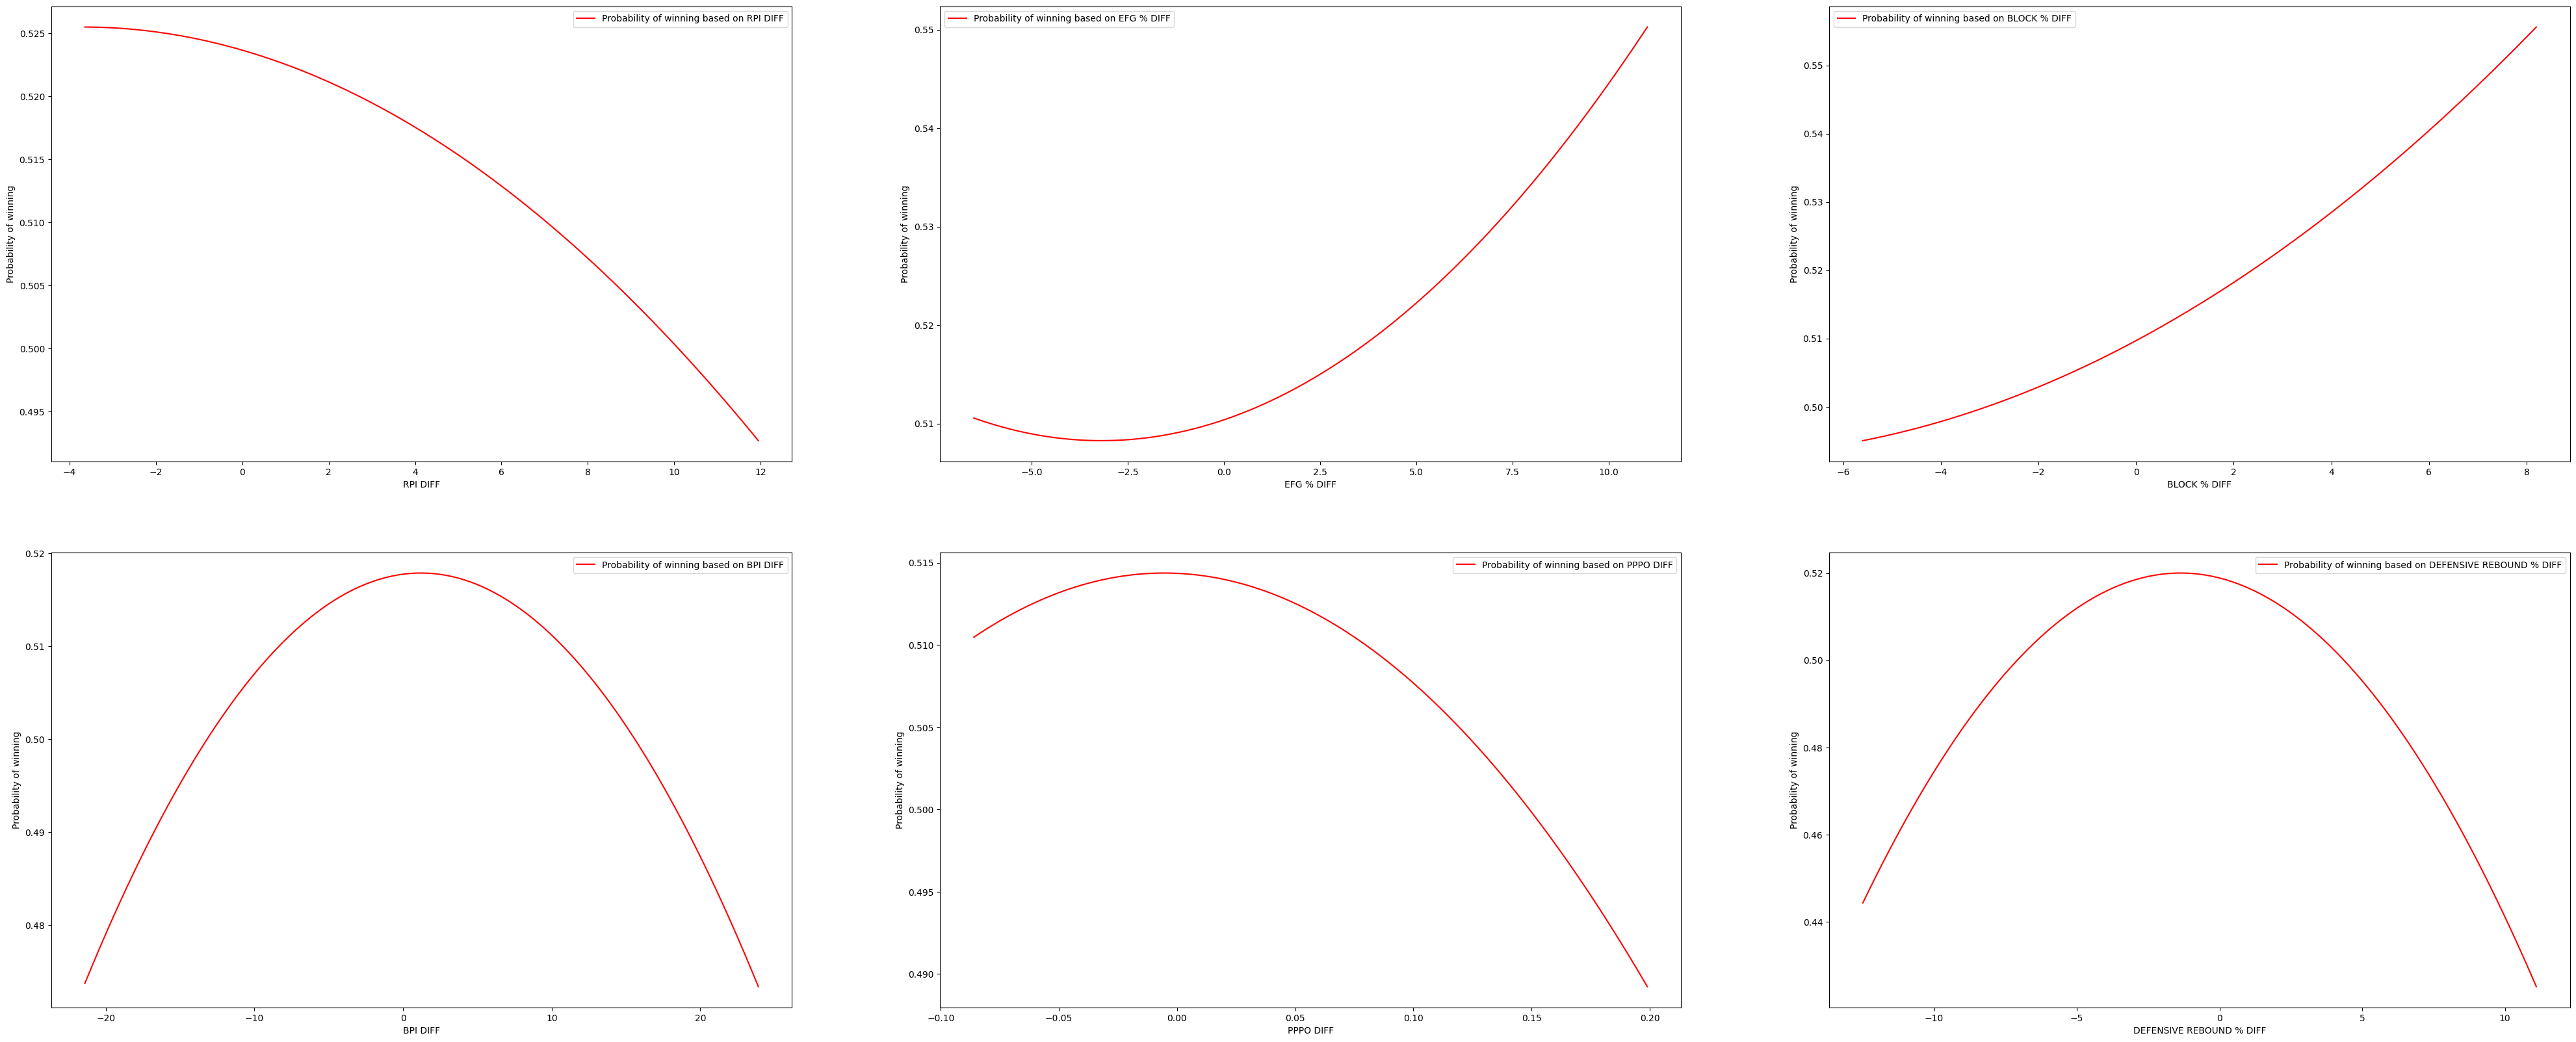

In [206]:
x_test = test_game_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(linear_models, polys, ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF'])):
    x_test[feature] = x_test[feature]
    x = np.linspace(x_test[feature].min(), x_test[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='Probability of winning based on ' + feature)
    ax[i//3, i%3].legend(loc='best')
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_ylabel('Probability of winning')

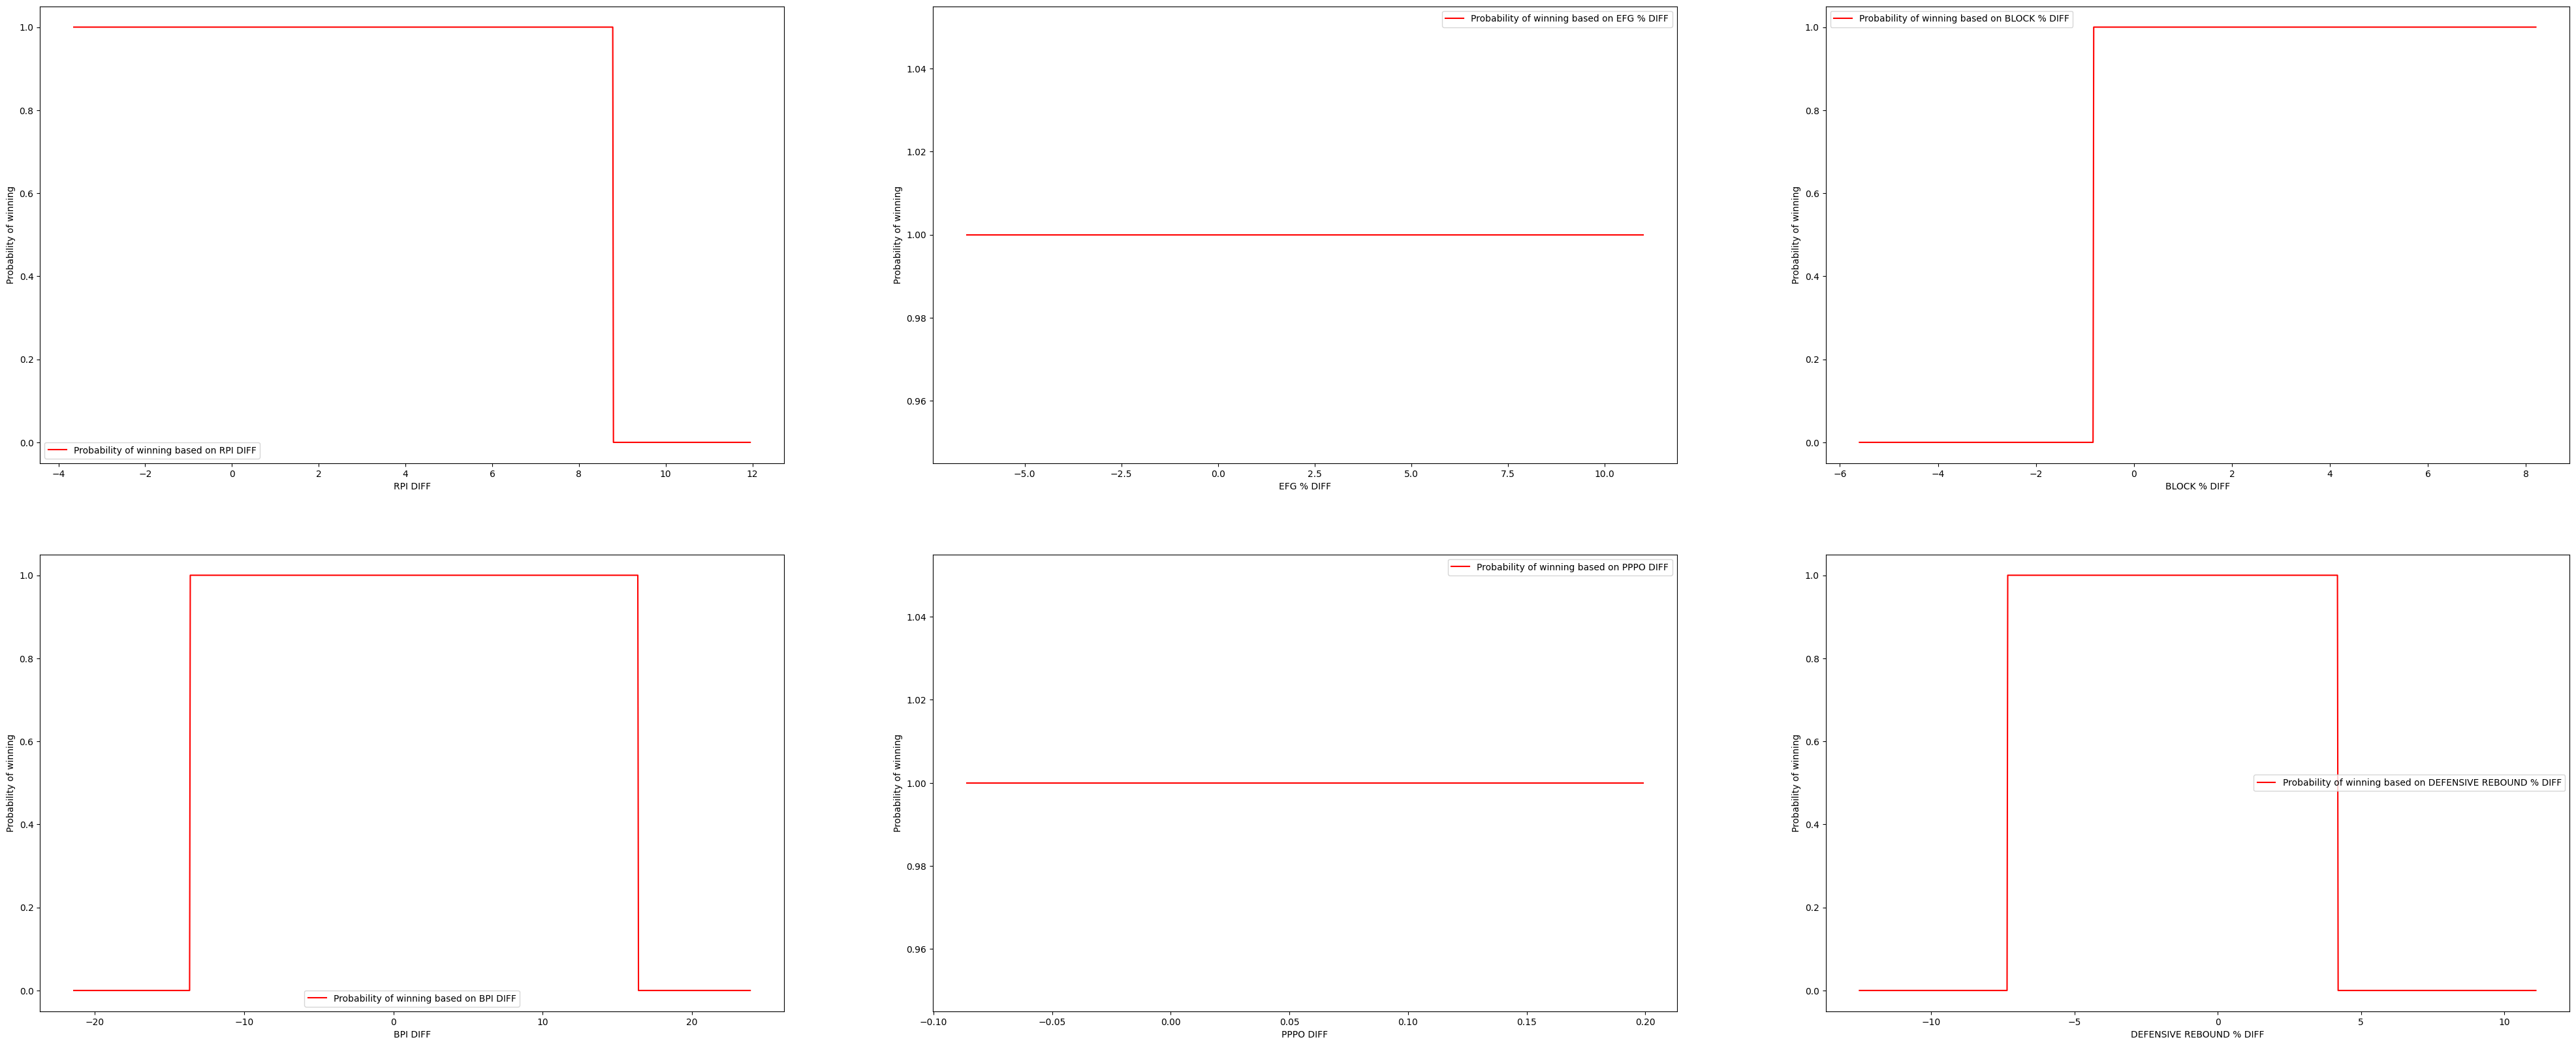

In [207]:
x_test = test_game_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(logistic_models, polys, ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF'])):
    x_test[feature] = x_test[feature]
    x = np.linspace(x_test[feature].min(), x_test[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='Probability of winning based on ' + feature)
    ax[i//3, i%3].legend(loc='best')
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_ylabel('Probability of winning')

Na prikazanim grafovima možemo uočiti kako se modeli ponašaju. Možemo primjetiti kako model kvadratne linearne regresije daje neke rezultate koji bi se mogli interpretirati kao vjerojatnost ekipe `TEAM 1` da pobijedi ekipu `TEAM 2`, dok model logističke regresije daje rezultate koji se mogu interpretirati kao vjerojatnost ekipe `TEAM 1` da pobijedi ekipu `TEAM 2` (zbog vrijednosti iz intervala [0, 1]), no tu se vrijednost izlaza može više interpretirati u kontekstu klasifikacije, a ne regresije, tj da li će ekipa `TEAM 1` pobijediti ekipu `TEAM 2` ili neće.

Log-loss funkcija je funkcija koja se koristi za evaluaciju modela logističke regresije. Ona je definirana kao:
$$
L = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(p_i) + (1-y_i)\log(1-p_i)
$$
gdje:
- $N$ predstavlja broj primjera
- $y_i$ predstavlja stvarnu vrijednost izlaza modela
- $p_i$ predstavlja predviđenu vrijednost izlaza modela

Vrijednost log-loss gubitka rješenja rada jednaka je 0.56411, dok su vrijednosti log-loss gubitka rješenja ovog rada oko 0.69 za oba modela. To je suboptimalan rezultat, no to je zato što se može dosta toga poboljšati u samom pristupu rješavanja ovog problema.

Ono što je također vidljivo jest da oba modela ne daju uvjervljive predikcije vjerojatnosti pobjede određene ekipe, tj. vjerojatnosti koje su gotove jednake slučajnom odabiru.

In [208]:
random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: winner_logistic(x, logistic_models, polys, features), axis=1)
print(f'Logistic regression accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])
print()

random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
print(f'Linear regression accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Logistic regression accuracy on training data: 0.6931643556132409
                      TEAM 1               TEAM 2  PREDICTED TEAM 1 WIN  \
6917              Pittsburgh       Boston College              0.504559   
6361                  Bryant               Wagner              0.507623   
1581              Cincinnati          Florida A&M              0.504559   
4165        Coastal Carolina  Louisiana Lafayette              0.511960   
8356                Cal Poly         UC San Diego              0.508297   
434              Utah Valley    Abilene Christian              0.508911   
4284        Georgia Southern      Appalachian St.              0.509036   
7319        South Dakota St.         George Mason              0.508681   
1747  Mississippi Valley St.      Bethune Cookman              0.507471   
8516            Nicholls St.          New Orleans              0.501396   

      TEAM 1 WIN  
6917         1.0  
6361         1.0  
1581         1.0  
4165         0.0  
8356         

In [200]:
random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: logistic_model.predict_proba(poly_logistic.transform(x[features].values.reshape(1, -1)))[0][1], axis=1)
print(f'Logistic regression (multivariate) accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Logistic regression (multivariate) accuracy on training data: 0.7092682881846666
                  TEAM 1         TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
10624   Illinois Chicago     Fort Wayne              0.473019         0.0
953                Akron           UCLA              0.541696         0.0
7482            Maryland      Minnesota              0.516221         1.0
2326            Davidson  East Carolina              0.428065         1.0
8911             Radford           Navy              0.381241         0.0
1254   Northern Illinois       Ball St.              0.500404         1.0
3638            American       Duquesne              0.502022         0.0
5237            Nebraska       Michigan              0.514350         0.0
6116    Central Arkansas   Kennesaw St.              0.523034         0.0
4675              Oregon       Portland              0.476304         1.0


Još ćemo prikazati i matricu zabune i ROC krivulju (gledano za problem određivanja pobjede/poraza) za oba modela.

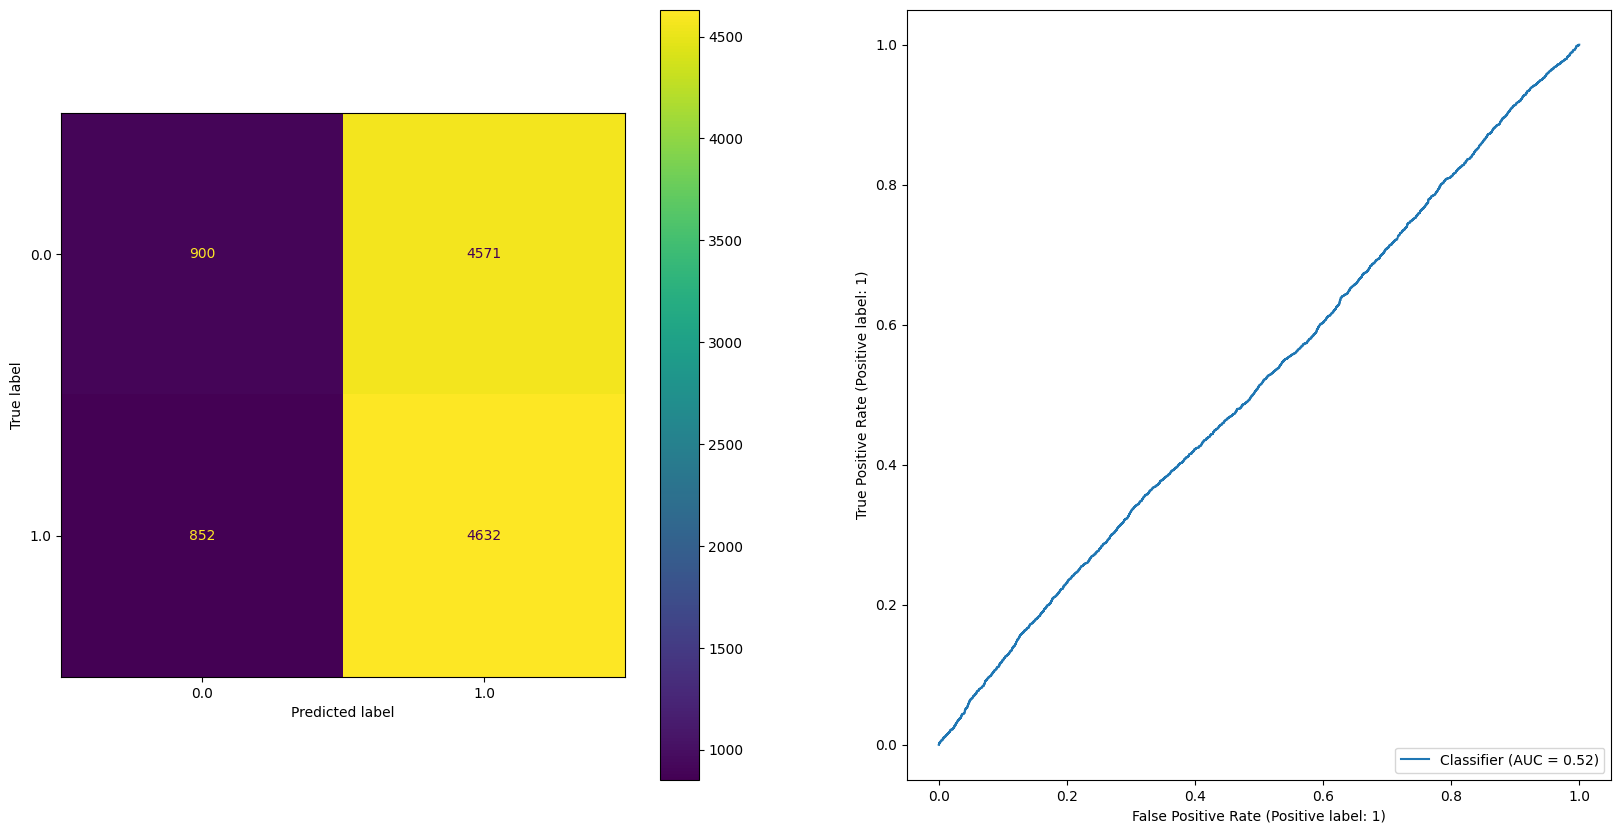

In [201]:
random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

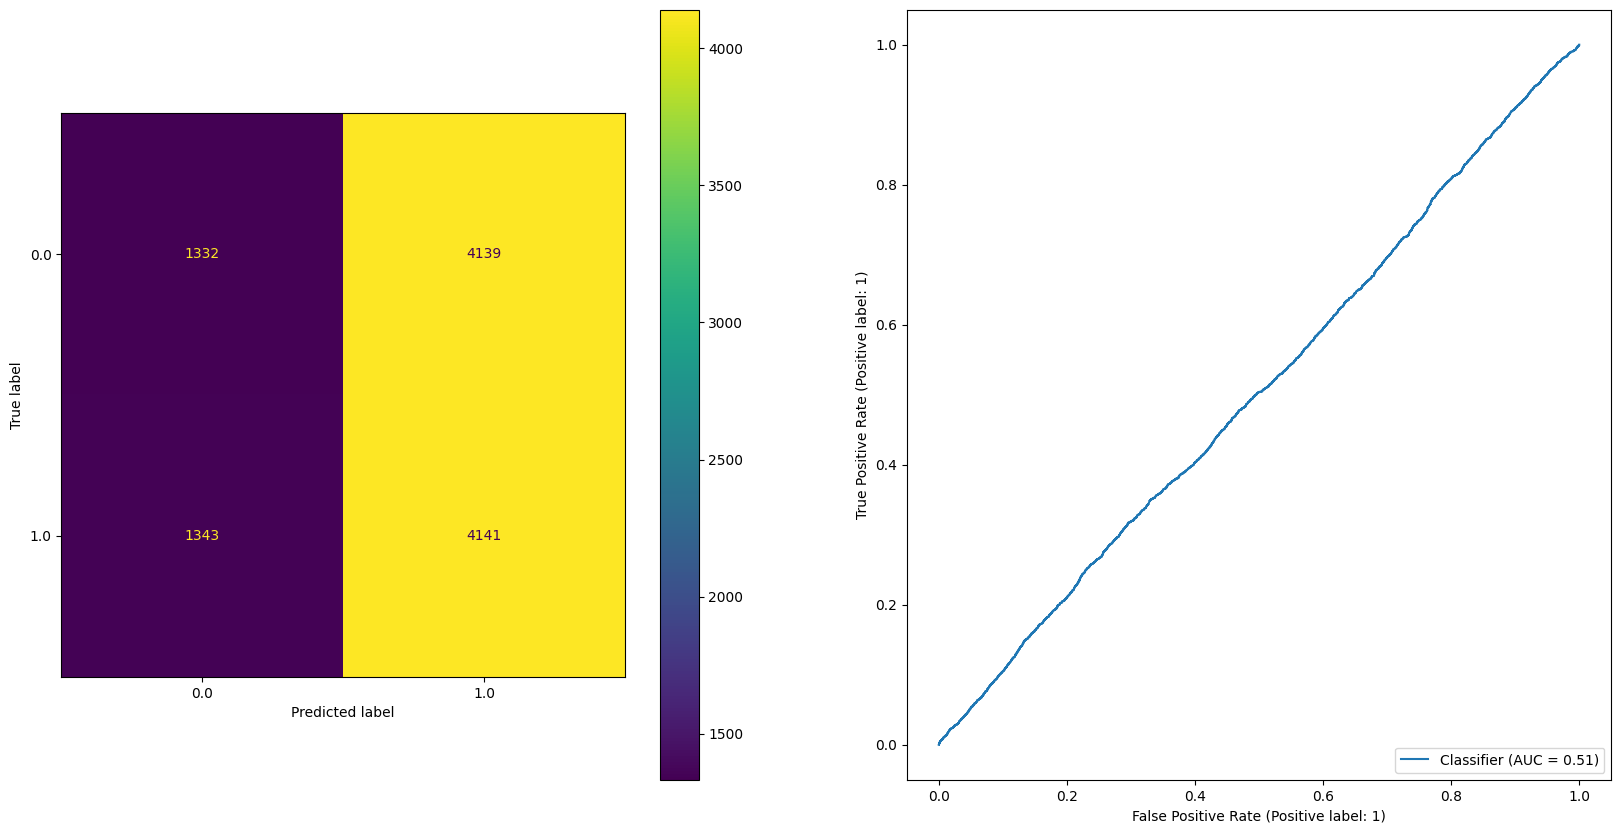

In [202]:
random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: winner_logistic(x, logistic_models, polys, features), axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])

Ovakvi rezultati nisu previše zadovoljavajući, a to sve zbog toga što je pristup rješavanja problema nije dovoljno dobar. U sljedećem koraku ćemo pokušati poboljšati rezultate.

### Drugi pristup

Značajka s kojom ćemo uspoređivati rezultate modela bit će **postotak pobjeda**. U ovom prisupu ćemo koristiti samo model kvadratne linerane regresije s obzirom da su ciljane izlazne vrijednosti kontinuirane.

In [220]:
polys = []
linear_models =[]
train_data = merged_data.sample(n=1000, random_state=42)

for v in features:
    poly = PolynomialFeatures(degree=2)
    X_train = train_data[v].values.reshape(-1, 1)
    X_train_poly = poly.fit_transform(X_train)
    
    lin_model = Ridge(alpha=0.1)
    lin_model.fit(X_train_poly, train_data['TEAM 1 WIN %']/100)

    polys.append(poly)
    linear_models.append(lin_model)

In [221]:
def probability_linear(test_data, models, polys, features):
    prob = []

    for model, poly, feature in zip(models, polys, features):
        X_test = np.array(abs(test_data[feature])).reshape(-1, 1)
        X_test_poly = poly.transform(X_test)
        pos = 1 if test_data[feature] > 0 else 0
        prob.append(np.where(pos, model.predict(X_test_poly)[0], 1 - model.predict(X_test_poly)[0]))

    return np.mean(prob)

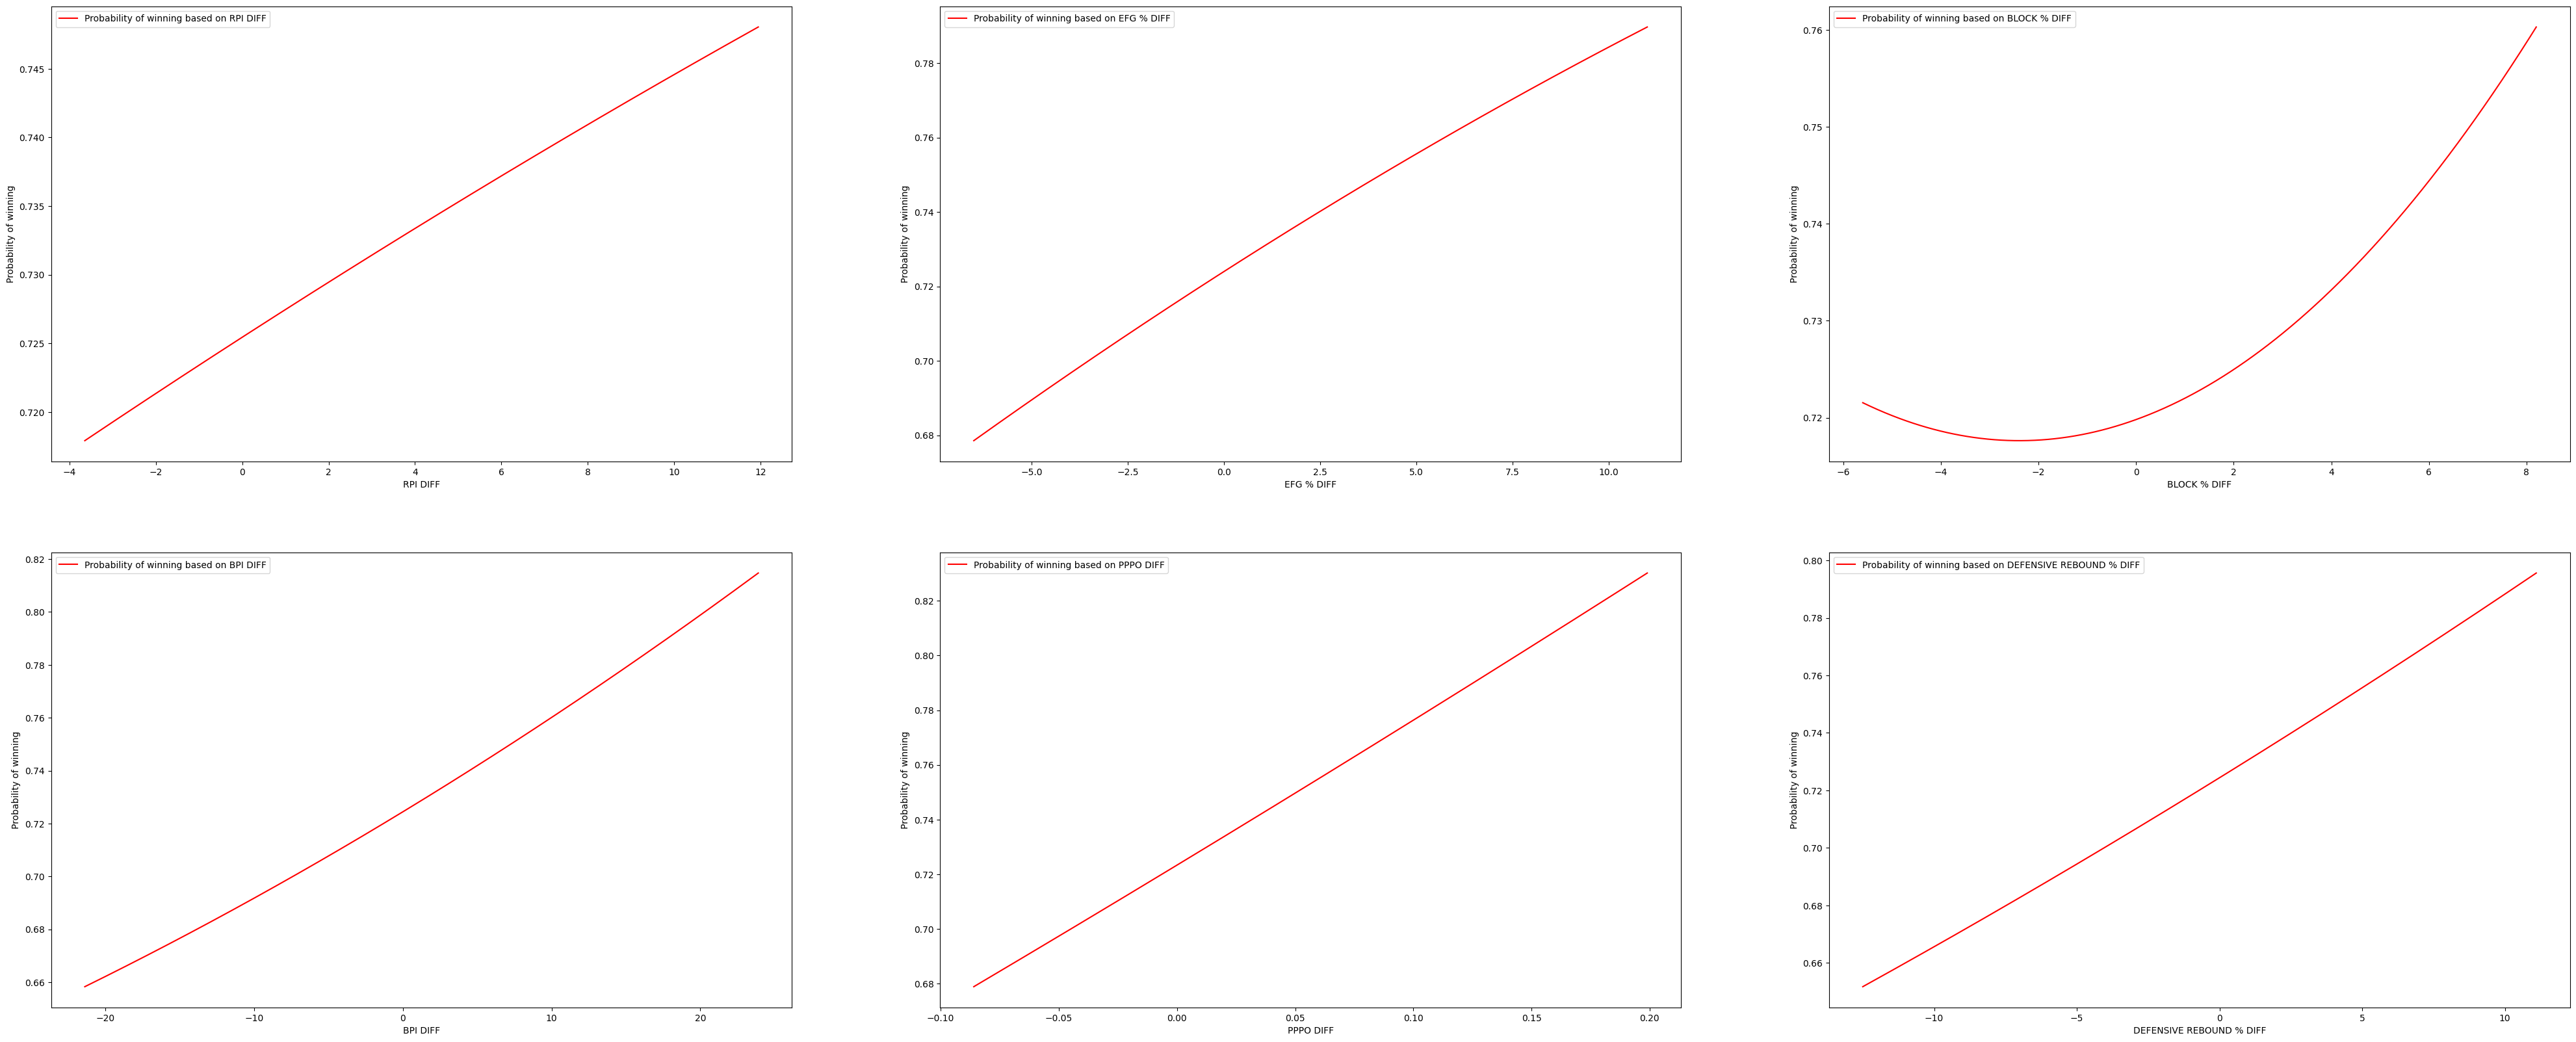

In [222]:
x_test = test_game_data.copy()

f, ax = plt.subplots(2, 3, figsize=(50, 20))
for i, (model, poly, feature) in enumerate(zip(linear_models, polys, ['RPI DIFF', 'EFG % DIFF', 'BLOCK % DIFF', 'BPI DIFF', 'PPPO DIFF', 'DEFENSIVE REBOUND % DIFF'])):
    x_test[feature] = x_test[feature]
    x = np.linspace(x_test[feature].min(), x_test[feature].max(), 1000)
    x_poly = poly.transform(x.reshape(-1, 1))
    ax[i//3, i%3].plot(x, model.predict(x_poly), c='r', label='Probability of winning based on ' + feature)
    ax[i//3, i%3].legend(loc='best')
    ax[i//3, i%3].set_xlabel(feature)
    ax[i//3, i%3].set_ylabel('Probability of winning')

In [223]:
random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: probability_linear(x, linear_models, polys, features), axis=1)
print(f'Linear regression accuracy on training data: {log_loss(random_matchups["TEAM 1 WIN"], random_matchups["PREDICTED TEAM 1 WIN"])}')
print(random_matchups.sample(10)[['TEAM 1', 'TEAM 2', 'PREDICTED TEAM 1 WIN', 'TEAM 1 WIN']])

Linear regression accuracy on training data: 0.7168504530510033
            TEAM 1               TEAM 2  PREDICTED TEAM 1 WIN  TEAM 1 WIN
7478      Maryland               Purdue              0.331911         0.0
10406       Denver     North Dakota St.              0.496490         0.0
2368         Drake       Nebraska Omaha              0.579647         1.0
3811      Duquesne             American              0.417051         1.0
1593    Cincinnati          Wichita St.              0.419647         1.0
1469   Alabama St.          Alabama A&M              0.418934         1.0
4763           USC        San Diego St.              0.507894         1.0
340           Troy     Jacksonville St.              0.579122         1.0
3150   Stony Brook  Central Connecticut              0.683261         1.0
2510          Iona                 Yale              0.760617         1.0


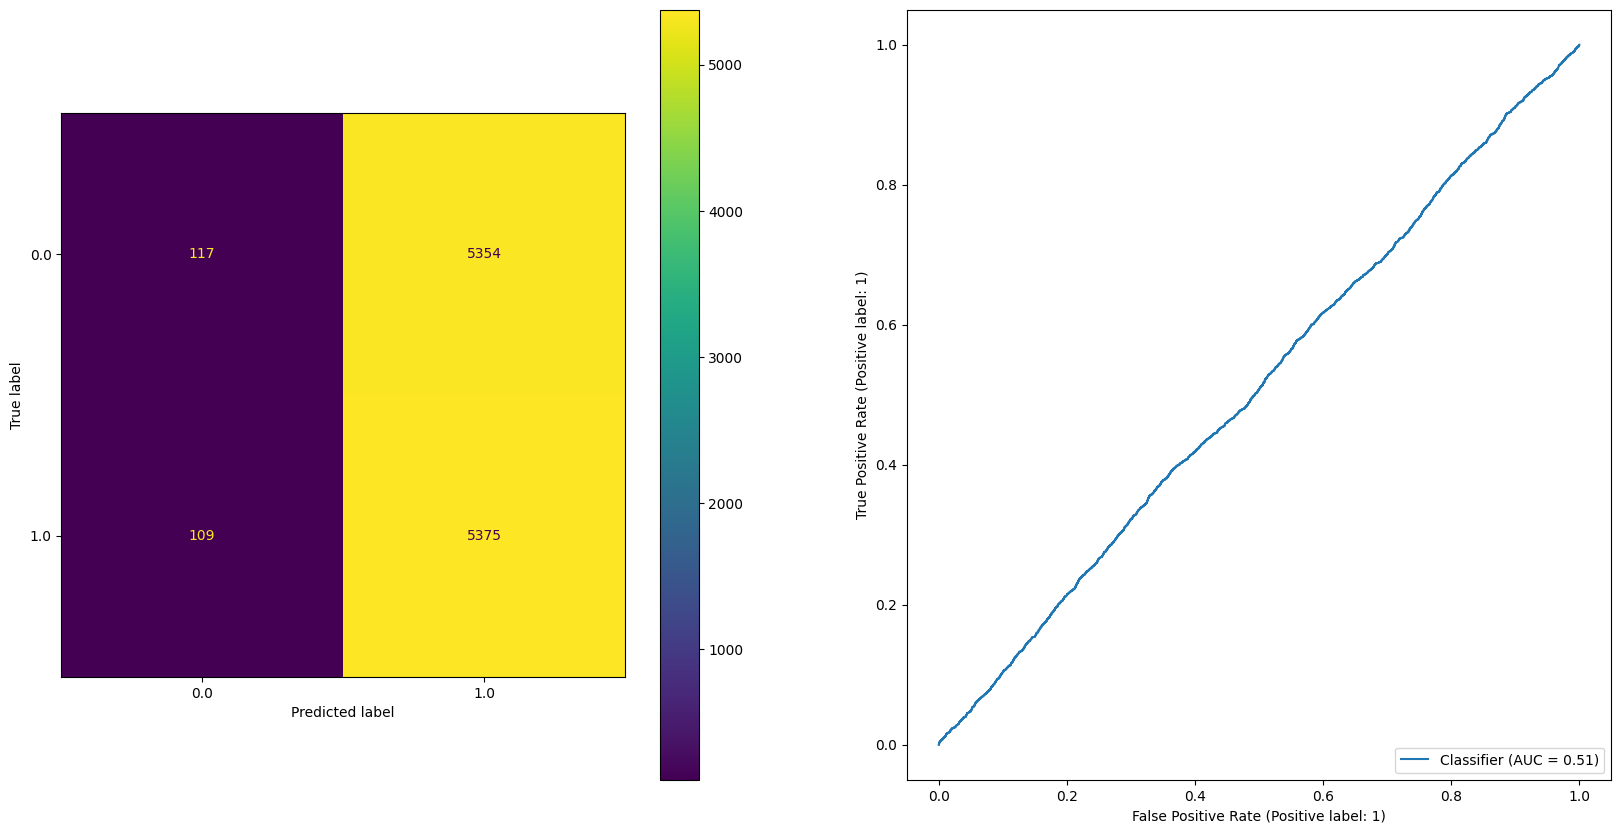

In [224]:
random_matchups = merged_data[merged_data['YEAR'] == 2022].copy()
random_matchups['PREDICTED TEAM 1 WIN'] = random_matchups.apply(lambda x: winner_logistic(x, logistic_models, polys, features), axis=1)
f, ax = plt.subplots(1, 2, figsize=(20, 10))
ConfusionMatrixDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'] > 0.5, ax=ax[0])
RocCurveDisplay.from_predictions(random_matchups['TEAM 1 WIN'], random_matchups['PREDICTED TEAM 1 WIN'], ax=ax[1])